Funny                  
Beautiful              
Ingenious              
Courageous             
Longwinded             
Confusing              
Informative            
Fascinating            
Unconvincing           
Persuasive             
Jaw-dropping           
OK                     
Obnoxious              
Inspiring              

____________________________________________________________________________________________________

## Contents

### 1. Aim

### 2. Exploratory Data Analysis

### 3. Modeling
* 3.1. OLS

### 4. RShiny App

### 5. Other possible Model
* 3.2. Gradient Boost Regression

### 1. Aim

# The aim of this project is to predict the number of views of a TedTalk.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from collections import Counter
import ast
from wordcloud import WordCloud
from ggplot import *

/Users/shreyasurana/anaconda3/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Users/shreyasurana/anaconda3/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp


In [9]:
tedtalks_df = pd.read_csv("/Users/shreyasurana/Desktop/Datasets/ted_main.csv")
tedtalks_df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


### 2. EDA

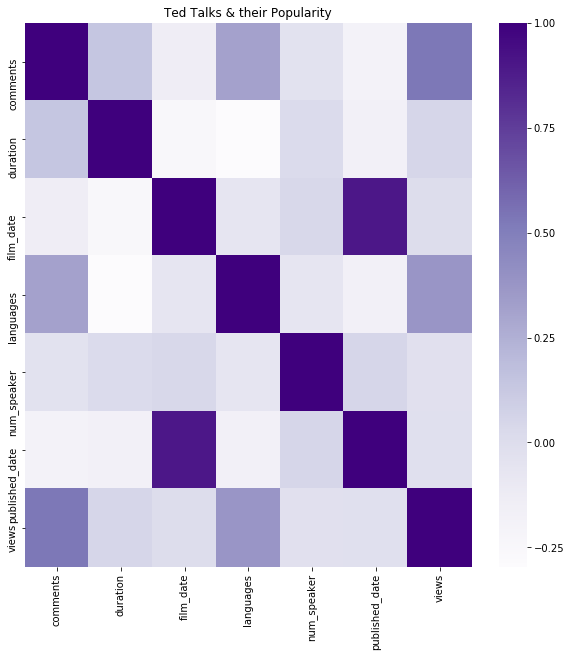

In [10]:
plt.subplots(figsize=(10,10))
ax = plt.axes()
ax.set_title("Ted Talks & their Popularity")
corr = tedtalks_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, cmap="Purples")

* Comments and views are highly related, it is an obvious observation
* Languages are highly correlated with views- larger audience can understand the talk.
* Duration also shows some correlation with views

#### Creating variables for attributes of the talks from 'ratings'

In [11]:
tedtalks_df['ratings'] = tedtalks_df['ratings'].apply(lambda x: eval(str(x))) 
ratingcats_df = pd.DataFrame(columns=['Funny', 'Beautiful', 'Ingenious', 'Courageous', 'Longwinded', 'Confusing', 'Informative', 'Fascinating', 'Unconvincing', 'Persuasive', 'Jaw-dropping', 'OK', 'Obnoxious', 'Inspiring'])

ind = 0
for i in tedtalks_df['ratings']:
  for j in i:
    ratingcats_df.loc[ind,j['name']] = j['count']
  ind+=1    
 

In [12]:
tedtalks_df = pd.concat([tedtalks_df, ratingcats_df], axis=1)
tedtalks_df.head(5)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,...,387,242,7346,10581,300,10704,4439,1174,209,24924
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,...,113,62,443,132,258,268,116,203,131,413
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,...,78,27,395,166,104,230,54,146,142,230
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,...,53,32,380,132,36,460,230,85,35,1070
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,...,110,72,5433,4606,67,2542,3736,248,61,2893


In [13]:
ratingcats_df.head(5)

,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring
0,19645,4573,6073,3253,387,242,7346,10581,300,10704,4439,1174,209,24924
1,544,58,56,139,113,62,443,132,258,268,116,203,131,413
2,964,60,183,45,78,27,395,166,104,230,54,146,142,230
3,59,291,105,760,53,32,380,132,36,460,230,85,35,1070
4,1390,942,3202,318,110,72,5433,4606,67,2542,3736,248,61,2893


In [14]:
from datetime import datetime
tedtalks_df['published_dayofweek'] = pd.to_numeric(tedtalks_df.apply(lambda row: datetime.fromtimestamp(row.published_date).strftime("%w"), axis=1))
tedtalks_df['published_month'] = pd.to_numeric(tedtalks_df.apply(lambda row: datetime.fromtimestamp(row.published_date).strftime("%-m"), axis=1))
tedtalks_df['published_year'] = pd.to_numeric(tedtalks_df.apply(lambda row: datetime.fromtimestamp(row.published_date).strftime("%Y"), axis=1))

In [ ]:
tedtalks_df.published_year.unique()

In [15]:
tedtalks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 34 columns):
comments               2550 non-null int64
description            2550 non-null object
duration               2550 non-null int64
event                  2550 non-null object
film_date              2550 non-null int64
languages              2550 non-null int64
main_speaker           2550 non-null object
name                   2550 non-null object
num_speaker            2550 non-null int64
published_date         2550 non-null int64
ratings                2550 non-null object
related_talks          2550 non-null object
speaker_occupation     2544 non-null object
tags                   2550 non-null object
title                  2550 non-null object
url                    2550 non-null object
views                  2550 non-null int64
Funny                  2550 non-null object
Beautiful              2550 non-null object
Ingenious              2550 non-null object
Courageous          

(array([ 1091.,   716.,   335.,   159.,    78.,    53.,    33.,    20.,
           17.,    17.]),
 array([    0.,   100.,   200.,   300.,   400.,   500.,   600.,   700.,
          800.,   900.,  1000.]),
 <a list of 10 Patch objects>)

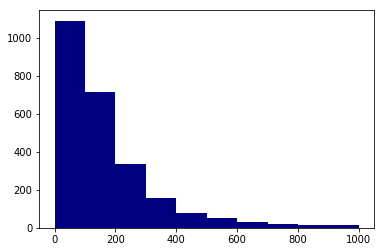

In [17]:
plt.hist(tedtalks_df['comments'], range= (0, 1000), color="navy")

(array([ 1047.,  1004.,   239.,    93.,    68.,    16.,    16.,    14.,
           12.,     7.]),
 array([        0.,   1000000.,   2000000.,   3000000.,   4000000.,
          5000000.,   6000000.,   7000000.,   8000000.,   9000000.,
         10000000.]),
 <a list of 10 Patch objects>)

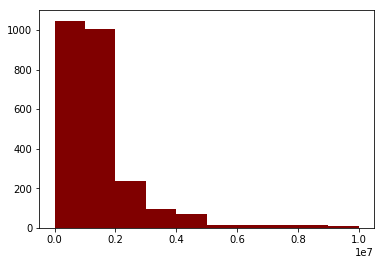

In [18]:
plt.hist(tedtalks_df['views'], range= (0, 10000000), color="maroon")

(array([  32.,  331.,  331.,  461.,  588.,  570.,  158.,   37.,   20.,    4.]),
 array([    0.,   200.,   400.,   600.,   800.,  1000.,  1200.,  1400.,
         1600.,  1800.,  2000.]),
 <a list of 10 Patch objects>)

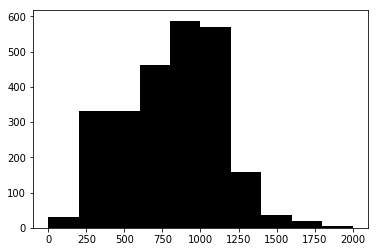

In [19]:
plt.hist(tedtalks_df['duration'], range= (0, 2000), color="black")

(array([ 130.,   55.,  296.,  897.,  793.,  287.,   67.,   15.,    6.,    4.]),
 array([  0. ,   7.2,  14.4,  21.6,  28.8,  36. ,  43.2,  50.4,  57.6,
         64.8,  72. ]),
 <a list of 10 Patch objects>)

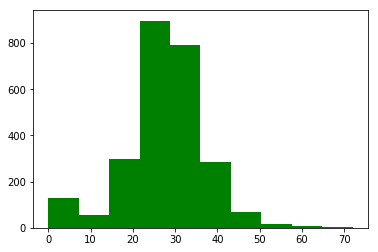

In [20]:
plt.hist(tedtalks_df['languages'], color="green")

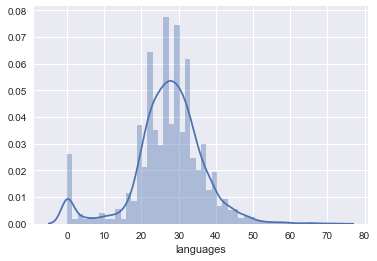

In [21]:
#plt.figure(figsize=(12,6))
#sns.countplot(x='languages', data=tedtalks_df, color='purple')
#plt.show()
sns.set(color_codes= True)
sns.distplot(tedtalks_df['languages'])
plt.show()

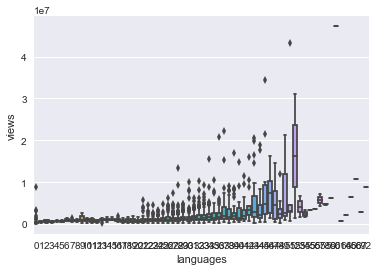

In [22]:
sns.boxplot(x='languages', y='views', data= tedtalks_df)

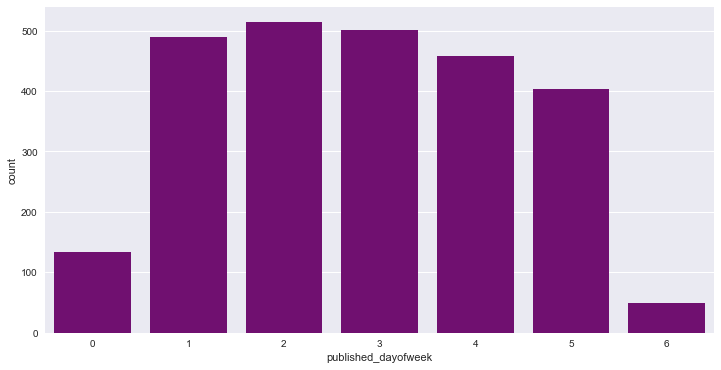

In [23]:
plt.figure(figsize=(12,6))
sns.countplot(x='published_dayofweek', data=tedtalks_df, color='purple')
plt.show()

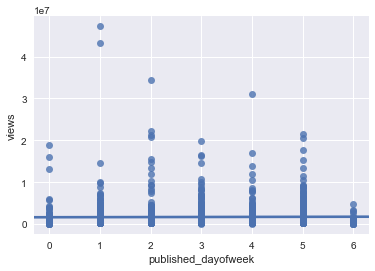

In [24]:
sns.regplot(x='published_dayofweek', y='views', data= tedtalks_df)

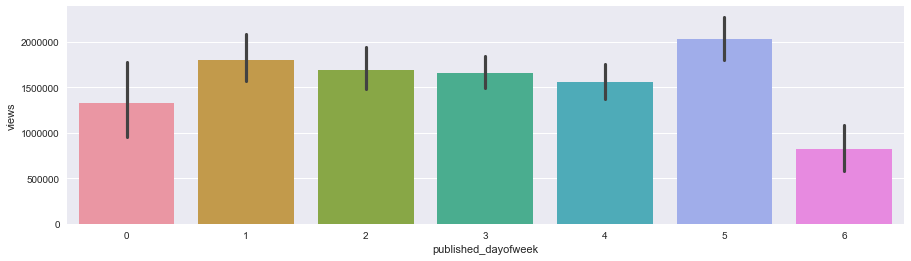

In [25]:
plt.figure(figsize=(15,4)) # this creates a figure 8 inch wide, 4 inch high
sns.barplot(x='published_dayofweek',y='views',data=tedtalks_df)
plt.show()

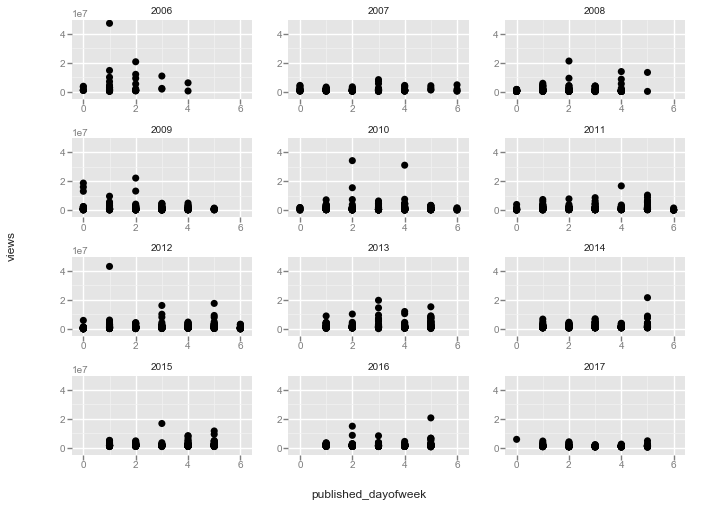

<ggplot: (-9223372029309643923)>

In [30]:
#g = sns.FacetGrid(tedtalks_df, col="published_year")
#g = (g.map(plt.scatter, "published_dayofweek", "views")
#       .add_legend())
ggplot(tedtalks_df, aes(x='published_dayofweek', y='views')) + geom_point(color='black', size=50) + facet_wrap("published_year")

In [31]:
tedtalks_df['overall']= (tedtalks_df['Funny'] + tedtalks_df['Beautiful'] + tedtalks_df['Ingenious'] + tedtalks_df['Courageous'] - tedtalks_df['Longwinded'] - tedtalks_df['Confusing'] + 
                tedtalks_df['Informative'] + tedtalks_df['Fascinating'] - tedtalks_df['Unconvincing'] + tedtalks_df['Persuasive'] + tedtalks_df['Jaw-dropping'] - 
                tedtalks_df['OK'] - tedtalks_df['Obnoxious'] + tedtalks_df['Inspiring'] )/14


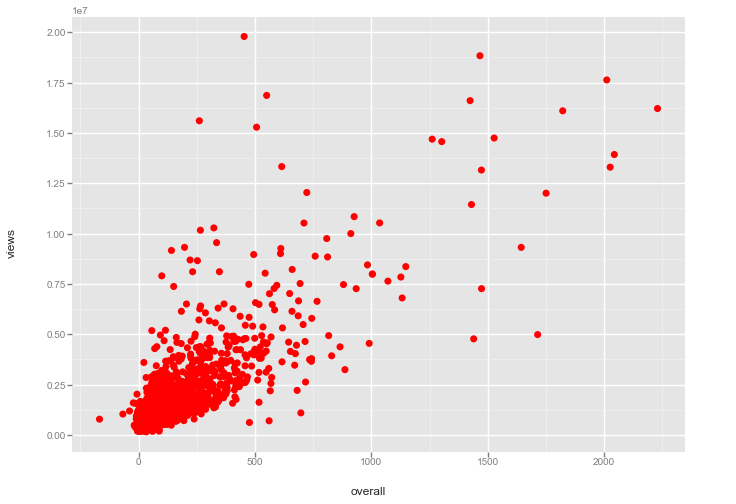

<ggplot: (7547183929)>

In [152]:
#sns.regplot(x='overall', y='views', data= tedtalks_df, color="red")
ggplot(tedtalks_df[tedtalks_df.views<20000000], aes(x='overall', y='views')) + geom_point(color='red', size=50) 

In [36]:
eda_model = sm.OLS(tedtalks_df['views'], sm.add_constant (tedtalks_df[['Funny', 'Beautiful','Ingenious', 'Courageous','Longwinded','Confusing', 
                                                 'Informative','Fascinating', 'Unconvincing','Persuasive','Jaw-dropping', 
                                                 'OK','Obnoxious', 'Inspiring']]).astype(float)).fit()
eda_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  views   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     736.3
Date:                Fri, 09 Mar 2018   Prob (F-statistic):               0.00
Time:                        16:55:14   Log-Likelihood:                -39113.
No. Observations:                2550   AIC:                         7.826e+04
Df Residuals:                    2535   BIC:                         7.834e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.602e+05   3.35e+04      4.788      0.000    9.46e+04    2.26e+05
Funny          796.9528     49.941     15.958      0.000     699.023     894.883
Beautiful      220.2579     78.587      2.803      0.005      66.157     374.359
Ingenious      604.6519    126.428      4.783      0.000     356.738     852.566
Courageous     596.9198     77.327      7.719      0.000     445.290     748.550
Longwinded   -3707.8650    798.361     -4.644      0.000   -5273.370   -2142.360
Confusing     3875.2859   1081.945      3.582      0.000    1753.700    5996.872
Informative   1096.2661     93.544     11.719      0.000     912.835    1279.697
Fascinating    534.3153     92.165      5.797      0.000     353.590     715.041
Unconvincing -1153.7233    424.814     -2.716      0.007   -1986.741    -320.705
Persuasive     -34.3895    109.913     -0.313      0.754    -249.917     181.138
Jaw-dropping    59.8211     59.841      1.000      0.318     -57.520     177.162
OK            6976.9335    400.445     17.423      0.000    6191.701    7762.166
Obnoxious      109.3285    667.858      0.164      0.870   -1200.274    1418.931
Inspiring      308.8339     44.334      6.966      0.000     221.900     395.768
==============================================================================
Omnibus:                     2129.057   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           202496.315
Skew:                           3.381   Prob(JB):                         0.00
Kurtosis:                      46.129   Cond. No.                     2.77e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
tedtalks_df['overall_2']= (tedtalks_df['Funny'] + tedtalks_df['Beautiful'] + tedtalks_df['Ingenious'] + tedtalks_df['Courageous'] - tedtalks_df['Longwinded'] + tedtalks_df['Confusing'] + 
                tedtalks_df['Informative'] + tedtalks_df['Fascinating'] - tedtalks_df['Unconvincing'] + 
                tedtalks_df['OK'] + tedtalks_df['Inspiring'] )/11

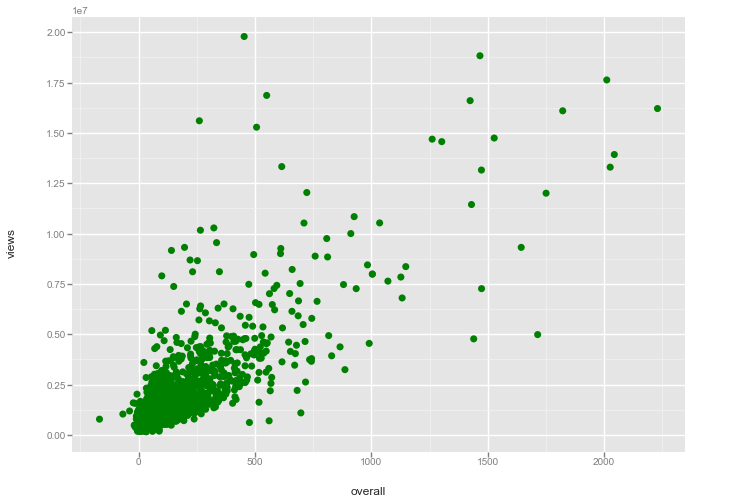

<ggplot: (7549238760)>

In [151]:
#sns.regplot(x='overall_2', y='views', data= tedtalks_df, color="green")
ggplot(tedtalks_df[tedtalks_df.views<20000000], aes(x='overall', y='views')) + geom_point(color='green', size=50) 


In [43]:
e=Counter(tedtalks_df['event'])
event=pd.DataFrame(columns=['event','occ'])
event['event']= e.keys()
event['occ']=e.values()
event.head()

,event,occ
0,TED2006,45
1,TED2004,31
2,TED2005,37
3,TEDGlobal 2005,26
4,TEDSalon 2006,4


In [44]:
event2= event[event.occ>35]
event2['event'].count()

19

In [77]:
tt2 = pd.merge(tedtalks_df,event2, how='inner', on=['event'])

In [78]:
tt2 = tt2.sort_values(by=['event']).reset_index(drop=True)

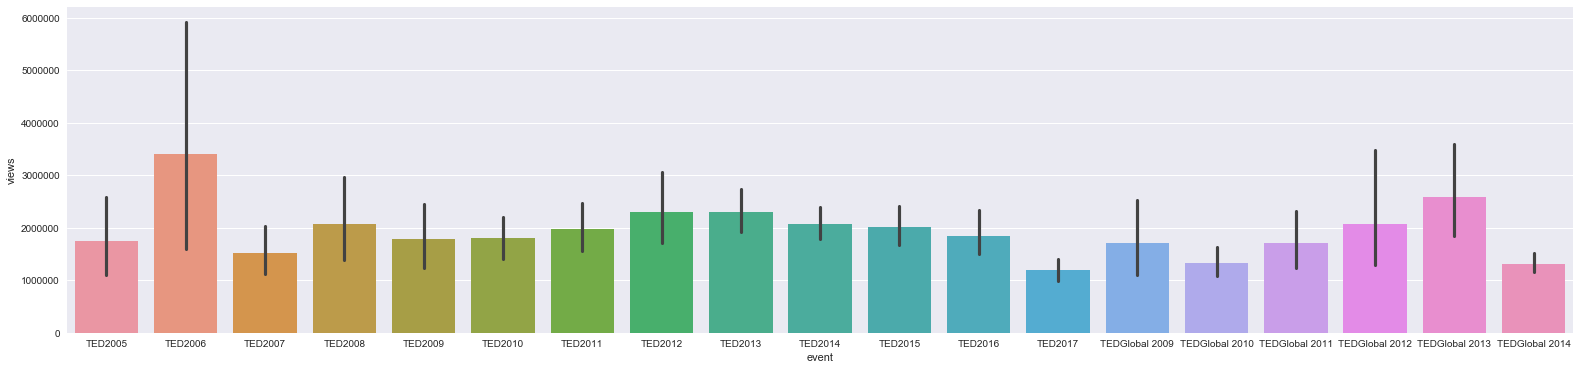

In [140]:
plt.figure(figsize=(27,6)) # this creates a figure 8 inch wide, 4 inch high
sns.barplot(x='event',y='views',data=tt2)
plt.show()

In [46]:
########Finding top events and speakers
topspeakerdf = tedtalks_df[['main_speaker','views']]
topspeakerdf = topspeakerdf.groupby( [ "main_speaker"] ).sum()
topspeakerdf = topspeakerdf.sort_values("views", ascending = False)
topeventdf = tedtalks_df[['event','views']]
topeventdf = topeventdf.groupby( [ "event"] ).sum()
topeventdf = topeventdf.sort_values("views", ascending = False)
topeventlist = topeventdf[0:10].index.values.tolist()
topspeakerlist = topspeakerdf[0:50].index.values.tolist()
topspeakerlist
topspeakerdf["perc_views"] = topspeakerdf["views"]/topspeakerdf["views"].sum()
topspeakerdf[0:100]["perc_views"].sum()
len(topspeakerdf)

2156

In [48]:
#####Creating Binary Variables

tedtalks_df['top_tags'] = tedtalks_df['tags'].apply(lambda y: 0 if len(y)==0 else 1 )
tedtalks_df['top_event'] = np.in1d(tedtalks_df['event'], topeventlist)
tedtalks_df['top_event'].replace(True,1)
tedtalks_df['top_speaker'] = np.in1d(tedtalks_df['main_speaker'], topspeakerlist)
tedtalks_df['top_speaker'].replace(True,1)

0        True
1       False
2       False
3       False
4        True
5        True
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21       True
22      False
23       True
24      False
25      False
26      False
27      False
28       True
29       True
        ...  
2520    False
2521    False
2522    False
2523    False
2524    False
2525    False
2526    False
2527    False
2528    False
2529    False
2530    False
2531    False
2532    False
2533    False
2534    False
2535    False
2536    False
2537    False
2538    False
2539    False
2540    False
2541    False
2542    False
2543    False
2544    False
2545    False
2546    False
2547    False
2548    False
2549    False
Name: top_speaker, Length: 2550, dtype: bool

### 3. Models

#### OLS

In [49]:
model_OLS = sm.OLS(tedtalks_df['views'], sm.add_constant (tedtalks_df[['Funny', 'Beautiful','Ingenious', 'Courageous','Longwinded','Confusing', 
                                                 'Informative','Fascinating', 'Unconvincing','OK','Inspiring', 
                                                  'duration','languages']]).astype(float)).fit()
model_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  views   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     799.7
Date:                Fri, 09 Mar 2018   Prob (F-statistic):               0.00
Time:                        17:23:53   Log-Likelihood:                -39105.
No. Observations:                2550   AIC:                         7.824e+04
Df Residuals:                    2536   BIC:                         7.832e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2.412e+05   1.02e+05     -2.366      0.018   -4.41e+05   -4.13e+04
Funny          784.9249     47.549     16.508      0.000     691.685     878.164
Beautiful      218.1304     76.232      2.861      0.004      68.648     367.613
Ingenious      601.5988    118.875      5.061      0.000     368.497     834.701
Courageous     581.0090     76.263      7.619      0.000     431.466     730.552
Longwinded   -4253.3189    855.206     -4.973      0.000   -5930.291   -2576.346
Confusing     4178.7954   1072.475      3.896      0.000    2075.780    6281.811
Informative   1014.2771     78.773     12.876      0.000     859.812    1168.743
Fascinating    590.8334     81.389      7.259      0.000     431.237     750.429
Unconvincing -1182.5340    330.594     -3.577      0.000   -1830.795    -534.273
OK            6884.1896    436.651     15.766      0.000    6027.961    7740.418
Inspiring      303.5084     36.590      8.295      0.000     231.759     375.258
duration       189.8625     70.631      2.688      0.007      51.363     328.362
languages     1.054e+04   2737.243      3.851      0.000    5173.165    1.59e+04
==============================================================================
Omnibus:                     2163.248   Durbin-Watson:                   1.786
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           196504.914
Skew:                           3.490   Prob(JB):                         0.00
Kurtosis:                      45.435   Cond. No.                     8.35e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
model_OLS2 = sm.OLS(tedtalks_df['views'], sm.add_constant (tedtalks_df[['overall', 
                                                  'comments','languages']]).astype(float)).fit()
model_OLS2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  views   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     2435.
Date:                Fri, 09 Mar 2018   Prob (F-statistic):               0.00
Time:                        17:24:04   Log-Likelihood:                -39457.
No. Observations:                2550   AIC:                         7.892e+04
Df Residuals:                    2546   BIC:                         7.895e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.564e+05    7.7e+04     -2.032      0.042   -3.07e+05   -5460.591
overall     7285.9339    114.473     63.648      0.000    7061.465    7510.403
comments    -148.6313    114.837     -1.294      0.196    -373.816      76.553
languages   3.065e+04   2816.299     10.884      0.000    2.51e+04    3.62e+04
==============================================================================
Omnibus:                     2453.478   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           342615.385
Skew:                           4.167   Prob(JB):                         0.00
Kurtosis:                      59.171   Cond. No.                     1.32e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
model3 = sm.OLS(tedtalks_df['views'], sm.add_constant (tedtalks_df[['Funny', 'Beautiful','Ingenious', 'Courageous','Longwinded','Confusing', 
                                                 'Informative','Fascinating', 'Unconvincing','OK','Inspiring', 'comments',
                                                'languages','published_dayofweek','published_year']]).astype(float)).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  views   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     748.4
Date:                Fri, 09 Mar 2018   Prob (F-statistic):               0.00
Time:                        17:37:11   Log-Likelihood:                -39025.
No. Observations:                2550   AIC:                         7.808e+04
Df Residuals:                    2534   BIC:                         7.818e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1.916e+08    1.6e+07    -11.936      0.000   -2.23e+08    -1.6e+08
Funny                 782.9036     46.312     16.905      0.000     692.090     873.718
Beautiful             145.5480     74.083      1.965      0.050       0.279     290.817
Ingenious             747.5158    116.905      6.394      0.000     518.277     976.755
Courageous            603.1321     77.754      7.757      0.000     450.663     755.601
Longwinded           -155.0668    798.713     -0.194      0.846   -1721.264    1411.130
Confusing            4382.7127   1044.010      4.198      0.000    2335.512    6429.913
Informative           944.6164     76.802     12.299      0.000     794.016    1095.217
Fascinating           688.9802     79.237      8.695      0.000     533.605     844.356
Unconvincing        -1095.6755    337.015     -3.251      0.001   -1756.528    -434.823
OK                   6243.1568    407.691     15.313      0.000    5443.715    7042.598
Inspiring             290.2419     35.513      8.173      0.000     220.604     359.880
comments             -231.5951    110.407     -2.098      0.036    -448.092     -15.099
languages            1.465e+04   2617.959      5.595      0.000    9513.443    1.98e+04
published_dayofweek   3.45e+04   1.43e+04      2.409      0.016    6416.408    6.26e+04
published_year       9.503e+04   7971.838     11.921      0.000    7.94e+04    1.11e+05
==============================================================================
Omnibus:                     2242.886   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           239241.609
Skew:                           3.653   Prob(JB):                         0.00
Kurtosis:                      49.886   Cond. No.                     1.73e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 4. RShiny App

* average number of view: 

In [141]:
tedtalks_df['views'].mean()

1740295.440616133

### 5. Other possible Model

In [59]:
transcripts = pd.read_csv("/Users/shreyasurana/Desktop/Datasets/transcripts.csv")

In [60]:
######Transcript Scores
combined_t = pd.merge(tedtalks_df,transcripts, on='url')
combined_t["laughter_score"] = combined_t["transcript"].apply(lambda y: y.count('Laughter')/len(y))
combined_t["applause_score"] = combined_t["transcript"].apply(lambda y: y.count('Applause')/len(y))
combined_t["interaction_score"] = combined_t["transcript"].apply(lambda y: y.count('?')/len(y))


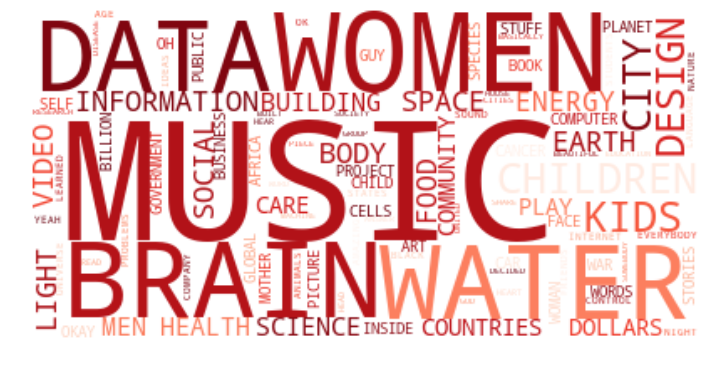

In [61]:
 

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words="english",
                        use_idf=True,
                        ngram_range=(1,1), # considering only 1-grams
                        min_df = 0.05,     # cut words present in less than 5% of documents
                        max_df = 0.3)      # cut words present in more than 30% of documents 


tfidf = vectorizer.fit_transform(transcripts['transcript'])
def rank_words(terms, feature_matrix):
    sums = feature_matrix.sum(axis=0)
    data = []
    for col, term in enumerate(terms):
        data.append( (term, sums[0,col]) )
    ranked = pd.DataFrame(data, columns=['term','rank']).sort_values('rank', ascending=False)
    return ranked

ranked = rank_words(terms=vectorizer.get_feature_names(), feature_matrix=tfidf)
dic = {ranked.loc[i,'term'].upper(): ranked.loc[i,'rank'] for i in range(0,len(ranked))}

wordcloud = WordCloud(background_color='white',
                      max_words=100,
                      colormap='Reds').generate_from_frequencies(dic)
fig = plt.figure(1,figsize=(12,10))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()


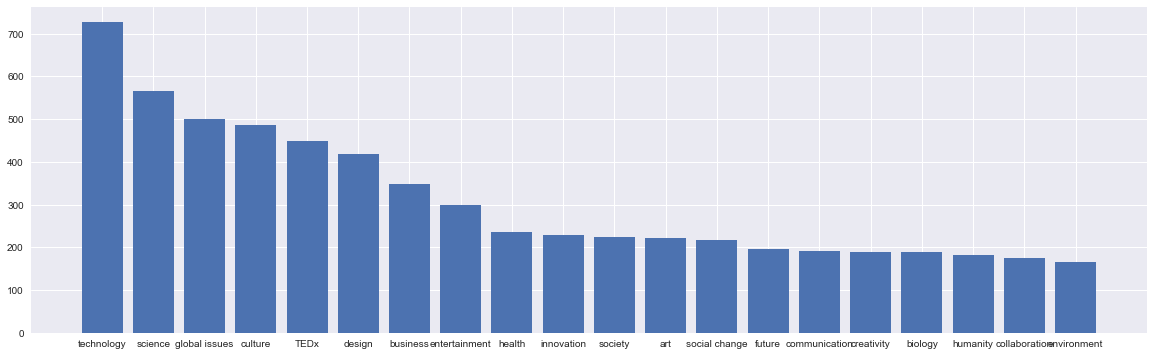

In [63]:
#######The output is to give a dictionary of top tags and counts
tedtalks_df["tags"] = tedtalks_df["tags"].apply(lambda x: ast.literal_eval(str(x)))
### To get the tags 
tag_count = {}
for list in tedtalks_df["tags"]:
    for string in list:
        if string in tag_count:
          tag_count[string] += 1
        else:
          tag_count.update({string : 1})
 
sorted_tags = sorted(tag_count, key=tag_count.get, reverse=True)
trim_tags_list = sorted_tags[0:20]



lst = []
for row in tedtalks_df["tags"]:
    row = [x for x in row if x in trim_tags_list]
    lst.append(row)
tedtalks_df["tags"] = lst

tagcount = dict.fromkeys(trim_tags_list, 0)
for tag in trim_tags_list:
    for lst in tedtalks_df["tags"]:
        if tag in lst: 
            tagcount[tag] += 1
            
###Top tags by count
plt.figure(figsize=(20,6))
plt.bar(range(len(tagcount)), tagcount.values(), align = 'center')
plt.xticks(range(len(tagcount)), tagcount.keys())
plt.show()


Text(0,0.5,'Percentage of total Views')

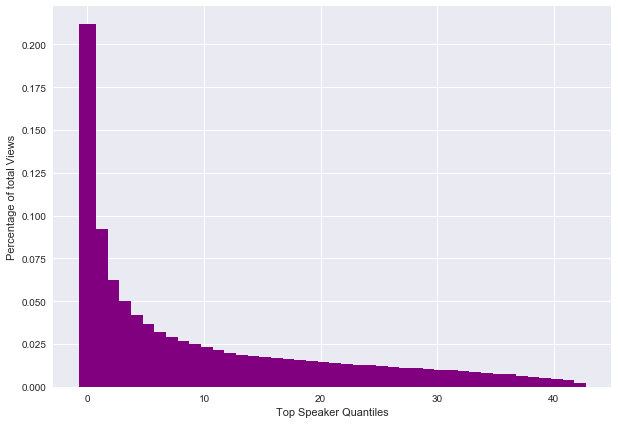

In [76]:
#########Bins sorted top speakers in groups of 50 and plots sum of the views
ind = range(0,2101,50)
ls = [*ind]
vals2 = []
for start in ls:
    stop = start+50
    vals2.append (topspeakerdf[start:stop]["perc_views"].sum())
plt.figure(figsize=(10,7))
plt.bar(range(len(vals2)), vals2, width = 1.5, color="purple")
plt.xlabel("Top Speaker Quantiles")
plt.ylabel("Percentage of total Views")

In [99]:
from sklearn.model_selection import train_test_split
xtrain, xtest = train_test_split(tedtalks_df, test_size=0.2)
ydf = tedtalks_df['views']
ytrain, ytest = train_test_split(ydf, test_size=0.2)

In [100]:
tedtalks_df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,published_year,overall,overall_2,top_tags,top_event,top_speaker,transcript,laughter_score,applause_score,interaction_score
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,...,2006,6373.29,7011.27,1,True,True,Good morning. How are you?(Laughter)It's been ...,0.002240,0.000230,0.002240
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,...,2006,100.143,152.636,1,True,False,"Thank you so much, Chris. And it's truly a gre...",0.001862,0.000508,0.000677
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,...,2006,130.714,184.909,1,True,False,"(Music: ""The Sound of Silence,"" Simon & Garfun...",0.002075,0.000655,0.001912
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,...,2006,231.857,256.818,1,True,False,If you're here today — and I'm very happy that...,0.000548,0.000384,0.000658
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,...,2006,1750.29,1720.64,1,True,True,"About 10 years ago, I took on the task to teac...",0.000576,0.000230,0.001267


In [132]:
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
tedtalks_df = combined_t 
tedtalks_df2 = tedtalks_df[['Funny', 'Beautiful','Ingenious', 'Courageous','Longwinded','Confusing',
                                                'Informative','Fascinating', 'Unconvincing','OK','Inspiring',
                                                 'comments','languages', 'top_tags', 'top_event', 'top_speaker']]
for c in tedtalks_df2.columns:
   tedtalks_df2[c]=tedtalks_df2[c].fillna(-1)
   if tedtalks_df2[c].dtype == 'object':
       lbl = LabelEncoder()
       lbl.fit(list(tedtalks_df2[c].values))
       tedtalks_df2[c] = lbl.transform(list(tedtalks_df2[c].values))

from sklearn.model_selection import train_test_split
xtrain, xtest = train_test_split(tedtalks_df2, test_size=0.2)
ydf = tedtalks_df['views']
ytrain, ytest = train_test_split(ydf, test_size=0.2)

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
         'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

a=clf.fit(xtrain, ytrain)
mse = mean_squared_error(ytest, y_pred)
print("MSE: %.4f" % mse)

/Users/shreyasurana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


MSE: 4062627801819.0728


In [135]:
y_pred=clf.predict(xtest)
ytest= ytest.as_matrix()

In [133]:
y_pred

array([ 2004865.12066807,  1427400.74403698,  1967277.28803467,
        1817283.77839158,  2407394.22011359,  1627533.73272775,
        1508066.47691256,  1532938.78829929,  1593287.10053587,
        1677662.37488256,  1423031.14432427,  1614577.28377205,
        1689856.05919018,  1676391.10261586,  1418052.96971743,
        1540457.79147201,  1554316.55650963,  2274466.79075085,
        1785953.65548287,  1242759.58423223,  1521516.33094835,
        2255522.13278367,  1660151.01642662,  3904895.04214076,
        1606412.63212883,  1860901.27241179,  1321162.92025949,
        2356009.81639567,  1447695.47914409,  1530219.84172396,
        1682404.38346522,  1673034.728075  ,  1314941.84683124,
        2213602.30146606,  2407058.13066468,  1603732.88636154,
        1159611.24746413,  1708731.04707386,  1356113.51970537,
        1673406.30966964,  1463811.77730993,  1582868.08809222,
        1584042.31626239,  1733668.05800071,  1481421.45748169,
        1398603.57009993,  1899047.32487

In [136]:
ytest

array([ 1532875,   933319,   590570,  4234334,  1362071,  2462734,
        8655723,   588691,  2824676,   382985,  2952041,  1195181,
        1260362,   403089,  1623637,  1995401,  1212774,  6263759,
        3658158,  1245095,  2352202,  2062308,  2350678,  1593079,
        1618434,   174326,  2533881,   501256,  1367702,  1919991,
        1236817,  1788182,   771144,  1301834,   602203,  1085138,
        1111146,  1342510,  1439616,  5893321,  1054718,  1439341,
         746852,   473165,  9551344,  2203020,  1225395,  2432449,
        1841716,  1108528,   783649,  1707855,  2581998,  1493606,
        1047389,  1885751,  6503775,  1158020,  1406128,  1628912,
         428470,   398713,   197139,   731620,  1588740,   596961,
        1623955,  4682458,  1512972,  2235902,   780039,  1537390,
        1485801,  1134525,  1476377,   679711,   485769,  1090180,
         437132,  1751030, 21190883,  1359611,   871452,  1947342,
         484266,  1035995,  1081270,   836699,  4016531,  1778

In [120]:
y_pred.shape

(494,)

#### Calculating accuracy

In [139]:
(abs(y_pred - ytest)).mean()

1176760.8413034673